# Fetch dataset metadata

In [1]:
%matplotlib inline
from metaspace import SMInstance
import matplotlib.pyplot as plt

This notebook provides a minimal example of accessing metadata for datasets submitted to [METASPACE](https://metaspace2020.eu)

In [2]:
sm = SMInstance()


In [ ]:
# Log in to METASPACE for access to private datasets. This step can be skipped if you only want to access public datasets.
# This will prompt you to enter your API key if needed and it will save it to a config file.
# Note that API keys should be kept secret like passwords.
sm.save_login()

In [ ]:
datasets = sm.datasets()
datasets = datasets[0:3]

In [3]:
datasets

[SMDataset(20201015_dv_mclr_100ugkg_5 | ID: 2020-11-21_00h33m21s),
 SMDataset(20201107_jl_bsubtilis_maldi_halfcolony_colony | ID: 2020-11-20_18h52m59s),
 SMDataset(20201107_jl_bsubtilis_maldi_halfcolony_4 | ID: 2020-11-20_18h32m59s)]

In [4]:
metadata = sm.get_metadata()
metadata.columns.values  # available metadata

array(['Data_Type', 'Sample_Information.Organism',
       'Sample_Information.Organism_Part', 'Sample_Information.Condition',
       'Sample_Information.Sample_Growth_Conditions',
       'Sample_Preparation.Sample_Stabilisation',
       'Sample_Preparation.Tissue_Modification',
       'Sample_Preparation.MALDI_Matrix',
       'Sample_Preparation.MALDI_Matrix_Application',
       'Sample_Preparation.Solvent', 'MS_Analysis.Polarity',
       'MS_Analysis.Ionisation_Source', 'MS_Analysis.Analyzer',
       'MS_Analysis.Detector_Resolving_Power.Resolving_Power',
       'MS_Analysis.Detector_Resolving_Power.mz',
       'MS_Analysis.Pixel_Size.Xaxis', 'MS_Analysis.Pixel_Size.Yaxis',
       'Additional_Information.Supplementary',
       'Submitted_By.Submitter.First_Name',
       'Submitted_By.Submitter.Email', 'Submitted_By.Submitter.Surname',
       'Submitted_By.Principal_Investigator.First_Name',
       'Submitted_By.Principal_Investigator.Email',
       'Submitted_By.Principal_Investigator

In [5]:
ionisation = metadata['MS_Analysis.Ionisation_Source'].value_counts()
ionisation_short = ionisation[:4]
ionisation_short['Other'] = ionisation[4:].sum()

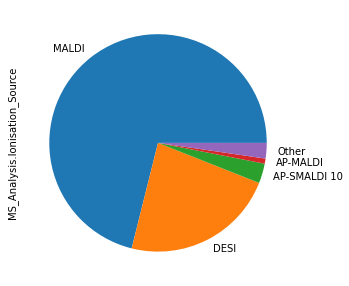

In [6]:
# Plot a pie chart of ionisation sources used
ionisation_short.plot(kind='pie', figsize=(5, 5));

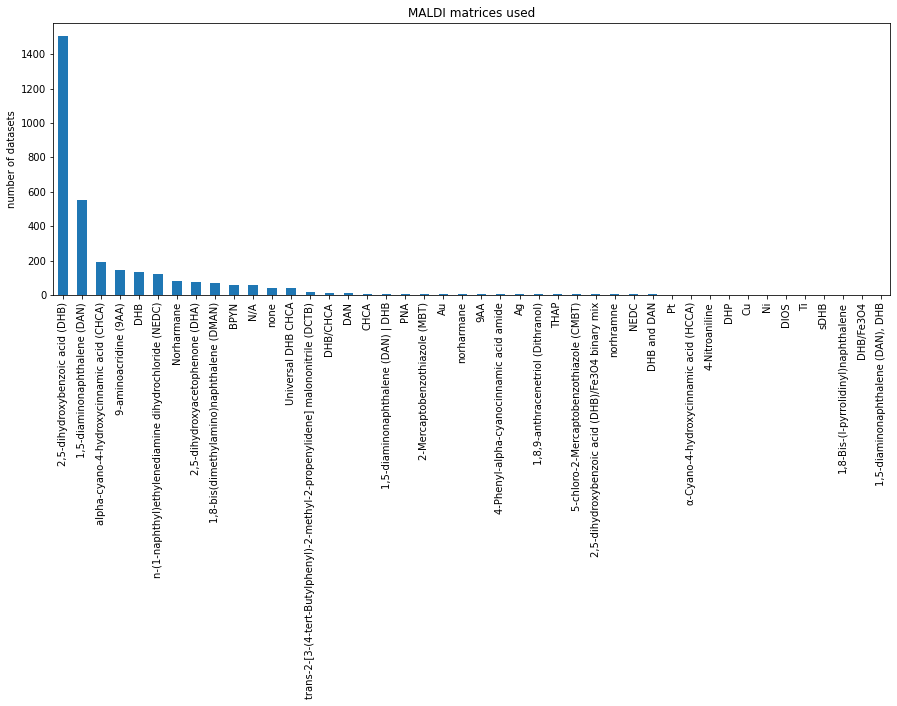

In [7]:
# Plot matrix popularity for MALDI datasets
maldi_metadata =  metadata.loc[metadata['MS_Analysis.Ionisation_Source']=='MALDI']

ax = maldi_metadata['Sample_Preparation.MALDI_Matrix'].value_counts()\
    .plot(kind='bar', figsize=(15, 5), title='MALDI matrices used')
ax.set_ylabel('number of datasets')
plt.show()